
# Support Vectore Machines Step 4 - TF Keras


## Read the csv file and convert the data into Numpy array

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

data = np.recfromcsv("haberman.csv", names=None)

x = data[:,0:3]
t = data[:,3]

## Visualize the data in 3d space

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(data, columns=["Age", "Year", "PAD", "Class"])
fig = px.scatter_3d(df, x=df.Age, y=df.Year, z=df.PAD, color=df.Class, symbol=df.Class)
fig.update_traces(marker_size=2)
fig.update_traces(marker_color=1)
fig.update_coloraxes(showscale=False)
fig.update_layout(legend_itemsizing="constant")
fig.show()

### In this step, do whatever you want to increase the accuracy of Haberman classification, but you must use TensorFlow Keras library. Report the final accuracy in this notebook, and compare it with the previous approaches.

### Also, draw your neural network architecture and save it in an image file "HW2.jpg" (different image format is allowed).

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = x.astype('float32')

# label encode strings to 0/1
y = LabelEncoder().fit_transform(t)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

# set number of input features
n_features = X_train.shape[1]

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

history = model.fit(X_train, 
                    y_train, 
                    epochs=200, 
                    validation_data=(X_test,y_test))

Epoch 1/200
7/7 [==============================] - 1s 67ms/step - loss: 12.5136 - accuracy: 0.2664 - val_loss: 12.2463 - val_accuracy: 0.2609
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 11.3157 - accuracy: 0.2664 - val_loss: 11.0531 - val_accuracy: 0.2609
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 10.1904 - accuracy: 0.2664 - val_loss: 9.9002 - val_accuracy: 0.2609
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 9.0652 - accuracy: 0.2664 - val_loss: 8.7918 - val_accuracy: 0.2609
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 7.9869 - accuracy: 0.2664 - val_loss: 7.7056 - val_accuracy: 0.2609
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 6.9171 - accuracy: 0.2664 - val_loss: 6.6409 - val_accuracy: 0.2609
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 5.8823 - accuracy: 0.2664 - val_loss: 5.6079 - val_accuracy: 0.2609
Epoch 8/200
7/7 [====

In [ ]:
losses = pd.DataFrame(model.history.history)

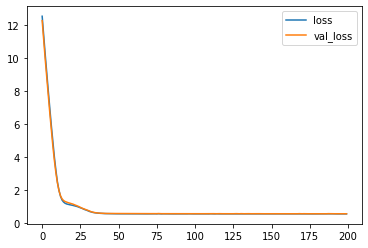

In [ ]:
losses[['loss','val_loss']].plot()

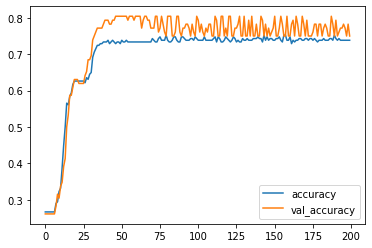

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7500


[0.5466492772102356, 0.75]